# Lead Scoring Case Study
### Submitted by : Siddhant Sareen & Gaurav Gianani

X Education sells online courses to industry professionals. X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

Business Objective:
- X education wants to know most promising leads
- For that they want to build a Model which identifies the hot leads
- Deployment of the model for the future use.

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
# Editing the column limit to show all columns 
pd.set_option('max_columns', None)
# Reading the Dataframe as 'df'
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
# Inspecting the Shape of the Dataframe 
df.shape

(9240, 37)

In [4]:
# Description of numerical variables
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
# Checking datatypes and columns of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

## Data Preparation

- Converting some binary variables into (0/1)

In [6]:
# Converting all Yes/No variables into Binary variables 1/0
varlist = ['Do Not Email',
     'Do Not Call',
     'Search',
     'Magazine',
     'Newspaper Article',
     'X Education Forums',
     'Newspaper',
     'Digital Advertisement',
     'Through Recommendations',
     'Receive More Updates About Our Courses',
     'Update me on Supply Chain Content',
     'Get updates on DM Content',
     'I agree to pay the amount through cheque',
     'A free copy of Mastering The Interview']
# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[varlist] = df[varlist].apply(binary_map)

In [7]:
# Checking the resulting dataframe 
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


- Replacing `Select` valued columns with NaNs as these columns were not entered during data entry

In [8]:
# Replacing 'Select' with NaN
df = df.replace(to_replace='Select',value=np.nan)
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,NaN,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,0,0,NaN,NaN,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,NaN,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,NaN,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


- Missing Value Treatment 

In [9]:
# Now treating the missing values
# Checking the columns with over 70% missing values 
(df.isnull().sum()/len(df)*100 > 70)

Prospect ID                                      False
Lead Number                                      False
Lead Origin                                      False
Lead Source                                      False
Do Not Email                                     False
Do Not Call                                      False
Converted                                        False
TotalVisits                                      False
Total Time Spent on Website                      False
Page Views Per Visit                             False
Last Activity                                    False
Country                                          False
Specialization                                   False
How did you hear about X Education                True
What is your current occupation                  False
What matters most to you in choosing a course    False
Search                                           False
Magazine                                         False
Newspaper 

In [10]:
# Dropping over 70% missing value columns 
missing_val = ['Specialization','How did you hear about X Education','Lead Profile']
df.drop(missing_val,axis=1,inplace=True)

In [11]:
# Checking the remaining missing value percentages 
df.isnull().sum()/len(df)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

- Checking for skewed columns, and dropping them
- Imputating missing values accordingly

In [12]:
# Country is a skewed column, dropping skewed column
df.Country.value_counts(normalize=True)*100

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Bahrain                  0.103260
Hong Kong                0.103260
France                   0.088509
Oman                     0.088509
unknown                  0.073757
Canada                   0.059006
Nigeria                  0.059006
Kuwait                   0.059006
Germany                  0.059006
South Africa             0.059006
Sweden                   0.044254
Italy                    0.029503
Ghana                    0.029503
Uganda                   0.029503
Philippines              0.029503
Bangladesh               0.029503
Belgium                  0.029503
Netherlands              0.029503
China                    0.029503
Asia/Pacific Region      0.029503
Kenya                    0.014751
Russia        

In [13]:
# Dropping column 'Country' 
df.drop('Country',axis=1,inplace=True)

In [14]:
# Checking 'Occupation' column
df['What is your current occupation'].value_counts(normalize=True)*100

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64

In [15]:
# Dropping Occupation for being skewed towards Unemployed
df.drop('What is your current occupation',axis=1,inplace=True)

In [16]:
# Inspecting 'choosing a course' column, Found out to be severely skewed
df['What matters most to you in choosing a course'].value_counts(normalize=True)*100

Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64

In [17]:
# Dropping the above column
df.drop('What matters most to you in choosing a course',axis=1,inplace=True)

In [18]:
# Inspecting the Tags column
df['Tags'].value_counts(normalize=True)*100

Will revert after reading the email                  35.196195
Ringing                                              20.434856
Interested in other courses                           8.714116
Already a student                                     7.898760
Closed by Horizzon                                    6.081196
switched off                                          4.076779
Busy                                                  3.159504
Lost to EINS                                          2.972652
Not doing further education                           2.463054
Interested  in full time MBA                          1.987430
Graduation in progress                                1.885510
invalid number                                        1.409886
Diploma holder (Not Eligible)                         1.070155
wrong number given                                    0.798369
opp hangup                                            0.560557
number not provided                                   0

In [19]:
# Condensing the Categories into 'Others' apart from the top 3 categories 
df['Tags'] = df['Tags'].apply(lambda x : x if x in ['Will revert after reading the email','Ringing','Interested in other courses'] else 'other')

In [20]:
# Checking the result 
df['Tags'].value_counts(normalize=True)*100

other                                  59.004329
Will revert after reading the email    22.424242
Ringing                                13.019481
Interested in other courses             5.551948
Name: Tags, dtype: float64

In [21]:
# Checking 'lead quality' 
df['Lead Quality'].value_counts(normalize=True)*100

Might be             34.875922
Not Sure             24.413146
High in Relevance    14.241002
Worst                13.436173
Low in Relevance     13.033758
Name: Lead Quality, dtype: float64

In [22]:
# Condensing Might be and Not Sure into one category
df['Lead Quality'] = df['Lead Quality'].apply(lambda x : x if x in ['High in Relevance','Low in Relevance'] else 'Not Sure')

In [23]:
# Checking the resulting column
df['Lead Quality'].value_counts(normalize=True)*100

Not Sure             86.796537
High in Relevance     6.893939
Low in Relevance      6.309524
Name: Lead Quality, dtype: float64

In [24]:
# The column ends up being skewed towards being Not Sure so is dropped
df.drop('Lead Quality',axis=1,inplace=True)

In [25]:
# Checking City column
df['City'].value_counts(normalize=True)*100

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64

In [26]:
# Missing values treated by Mode of the column
df['City'].fillna(df['City'].mode(),inplace=True)

In [27]:
# Other Cities are condensed together
df['City'] = df['City'].apply(lambda x : x if x in ['Mumbai','Thane & Outskirts'] else 'Other Cities')

In [28]:
# Checking the resulting column
df['City'].value_counts(normalize=True)*100

Other Cities         56.980519
Mumbai               34.880952
Thane & Outskirts     8.138528
Name: City, dtype: float64

In [29]:
# Checking another column 
df['Asymmetrique Activity Index'].value_counts(normalize=True)*100

02.Medium    76.443648
01.High      16.348068
03.Low        7.208284
Name: Asymmetrique Activity Index, dtype: float64

In [30]:
df['Asymmetrique Activity Index'].mode()

0    02.Medium
dtype: object

In [31]:
# Imputing the mode for NaN values 
df['Asymmetrique Activity Index'].fillna('02.Medium',inplace = True)

In [32]:
# Doing the same for Profile Index
df['Asymmetrique Profile Index'].value_counts(normalize=True)*100

02.Medium    55.515731
01.High      43.866985
03.Low        0.617284
Name: Asymmetrique Profile Index, dtype: float64

In [33]:
# Imputing the mode 
df['Asymmetrique Profile Index'].fillna('02.Medium',inplace=True)

In [34]:
# Inspecting the numerical column 
df['Asymmetrique Activity Score'].value_counts(normalize=True)*100

14.0    35.264835
15.0    25.746714
13.0    15.432099
16.0     9.299084
17.0     6.949423
12.0     3.902828
11.0     1.891677
10.0     1.135006
9.0      0.179211
18.0     0.099562
8.0      0.079650
7.0      0.019912
Name: Asymmetrique Activity Score, dtype: float64

In [35]:
# Imputing with mean value
df['Asymmetrique Activity Score'].fillna(df['Asymmetrique Activity Score'].mean(),inplace=True)

In [36]:
# Checking the changes 
df['Asymmetrique Profile Score'].value_counts(normalize=True)*100

15.0    35.025886
18.0    21.326165
16.0    11.927519
17.0    11.529271
20.0     6.133015
19.0     4.878534
14.0     4.500199
13.0     4.062127
12.0     0.438072
11.0     0.179211
Name: Asymmetrique Profile Score, dtype: float64

In [37]:
# Imputing with mean for Profile Score
df['Asymmetrique Profile Score'].fillna(df['Asymmetrique Profile Score'].mean(),inplace=True)

In [38]:
# Checking nulls in df again 
df.isnull().sum()/len(df)*100

Prospect ID                                 0.000000
Lead Number                                 0.000000
Lead Origin                                 0.000000
Lead Source                                 0.389610
Do Not Email                                0.000000
Do Not Call                                 0.000000
Converted                                   0.000000
TotalVisits                                 1.482684
Total Time Spent on Website                 0.000000
Page Views Per Visit                        1.482684
Last Activity                               1.114719
Search                                      0.000000
Magazine                                    0.000000
Newspaper Article                           0.000000
X Education Forums                          0.000000
Newspaper                                   0.000000
Digital Advertisement                       0.000000
Through Recommendations                     0.000000
Receive More Updates About Our Courses      0.

In [39]:
# The nulls are now present in negligible amount of rows so we drop those rows 
df_clean = df.dropna(axis=0)

In [40]:
# Checking the cleaned Dataframe 
df_clean.isnull().sum()/len(df)*100

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Tags                                        0.0
Update me on Supply Chain Content       

- Rows preserved after cleaning 

In [41]:
# We have preserved 98.2 % rows after data cleaning 
df_clean.shape[0]/df.shape[0]

0.982034632034632

### Some more housekeeping 

In [42]:
# Inspecting the 'Lead Source' column 
df_clean['Lead Source'].value_counts(normalize=True)*100

Google               31.606789
Direct Traffic       28.025127
Olark Chat           19.318933
Organic Search       12.717655
Reference             4.882081
Welingak Website      1.421644
Referral Sites        1.377562
Facebook              0.341635
bing                  0.066123
google                0.055102
Click2call            0.044082
Press_Release         0.022041
Live Chat             0.022041
Social Media          0.022041
WeLearn               0.011020
testone               0.011020
NC_EDM                0.011020
youtubechannel        0.011020
welearnblog_Home      0.011020
blog                  0.011020
Pay per Click Ads     0.011020
Name: Lead Source, dtype: float64

In [43]:
# Condensing the sparse values into Other category
df_clean['Lead Source'] = df_clean['Lead Source'].apply(lambda x : x if x in ['Google','Direct Traffic','Olark Chat','Organic Search'] else 'Others')

In [44]:
# Last Activity Column inspection
df_clean['Last Activity'].value_counts(normalize=True)*100

Email Opened                    37.822350
SMS Sent                        29.931673
Olark Chat Conversation         10.711924
Page Visited on Website          7.053119
Converted to Lead                4.716773
Email Bounced                    3.438395
Email Link Clicked               2.942473
Form Submitted on Website        1.278378
Unreachable                      0.991845
Unsubscribed                     0.650209
Had a Phone Conversation         0.275512
View in browser link Clicked     0.066123
Approached upfront               0.055102
Email Received                   0.022041
Email Marked Spam                0.022041
Resubscribed to emails           0.011020
Visited Booth in Tradeshow       0.011020
Name: Last Activity, dtype: float64

In [45]:
# Condensing the sparse values into Other category
df_clean['Last Activity'] = df_clean['Last Activity'].apply(lambda x : x if x in ['Email Opened','SMS Sent','Olark Chat Conversation'] else 'Others')

In [46]:
# Last Notable Activity inspection
df_clean['Last Notable Activity'].value_counts(normalize=True)*100

Modified                        36.003967
Email Opened                    31.110866
SMS Sent                        23.716112
Page Visited on Website          3.504518
Olark Chat Conversation          2.016751
Email Link Clicked               1.906546
Email Bounced                    0.661230
Unsubscribed                     0.495922
Unreachable                      0.352656
Had a Phone Conversation         0.154287
Email Marked Spam                0.022041
View in browser link Clicked     0.011020
Form Submitted on Website        0.011020
Email Received                   0.011020
Resubscribed to emails           0.011020
Approached upfront               0.011020
Name: Last Notable Activity, dtype: float64

In [47]:
# Condensing the sparse values into Other category
df_clean['Last Notable Activity'] = df_clean['Last Notable Activity'].apply(lambda x : x if x in ['Email Opened','Modified','SMS Sent'] else 'Others')

## Exploratory Data Analysis 

In [48]:
# Seperating variables for EDA
EDA_vars = ['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Tags',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

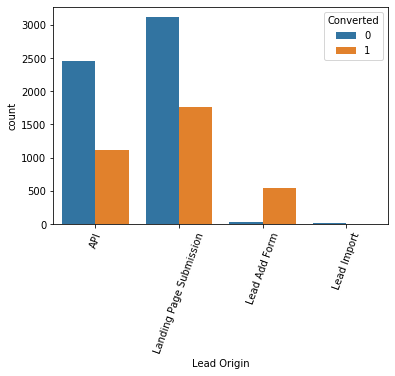

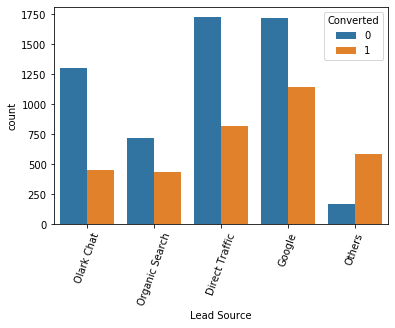

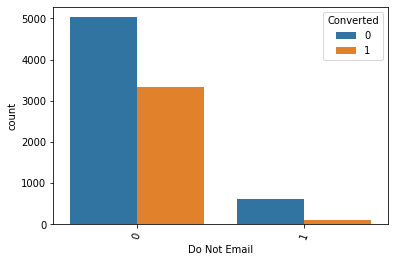

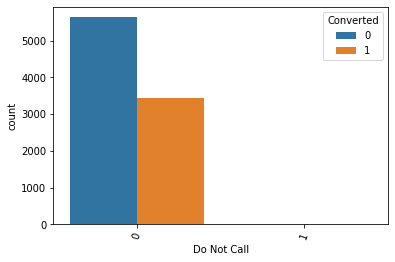

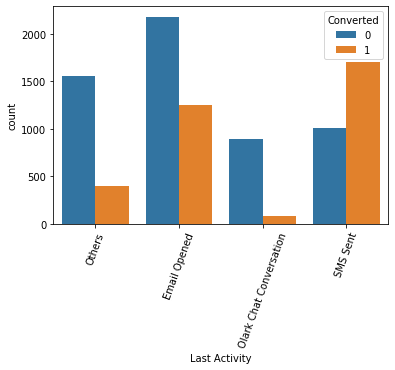

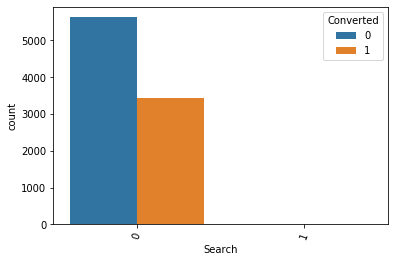

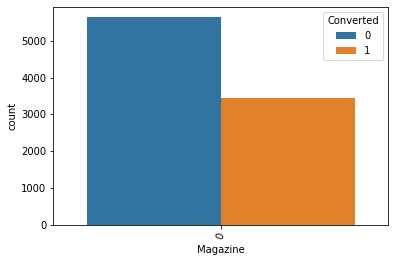

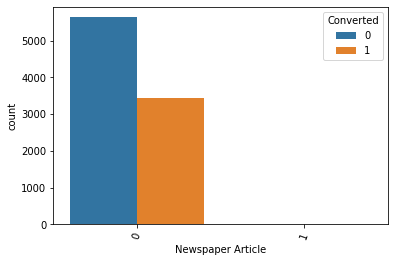

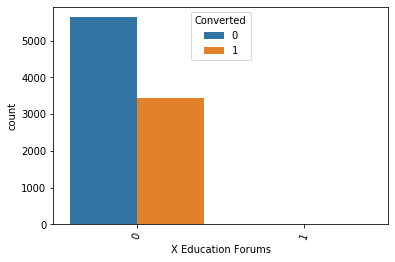

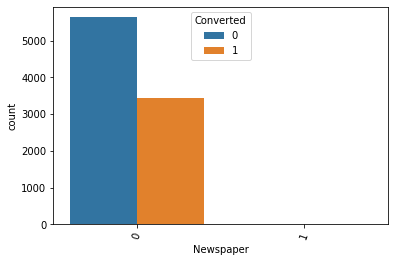

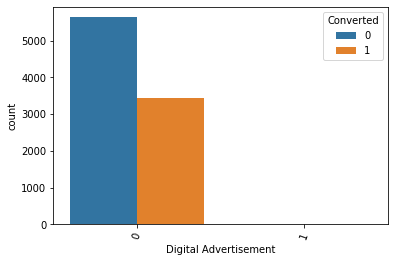

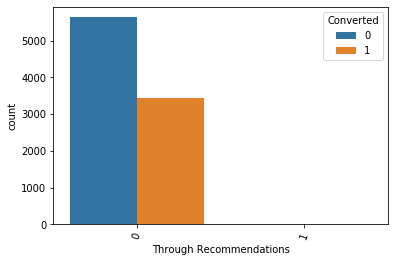

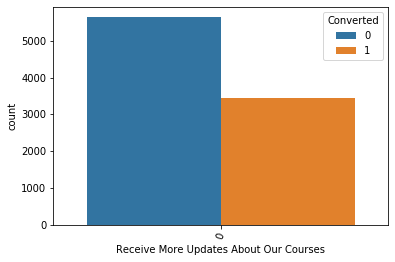

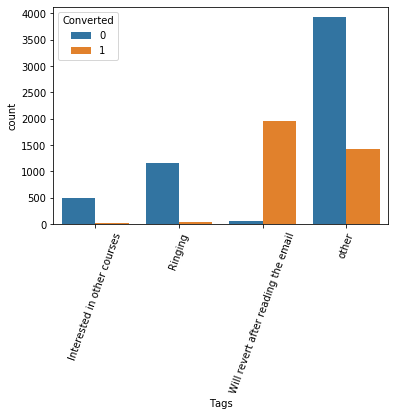

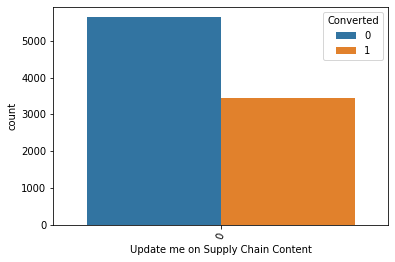

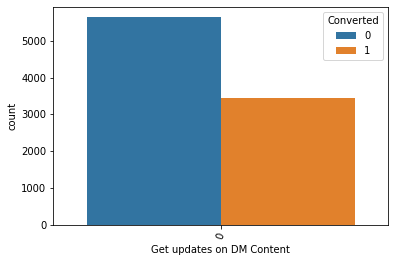

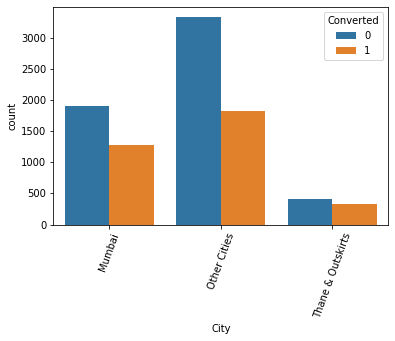

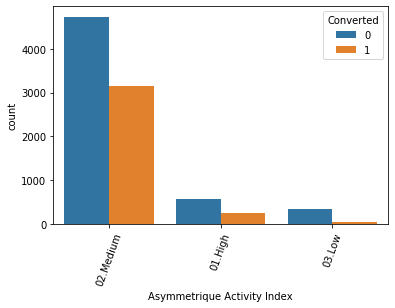

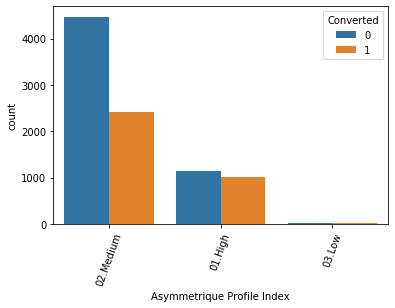

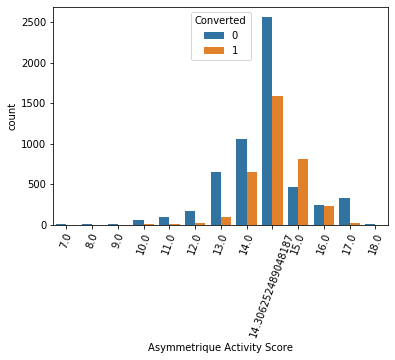

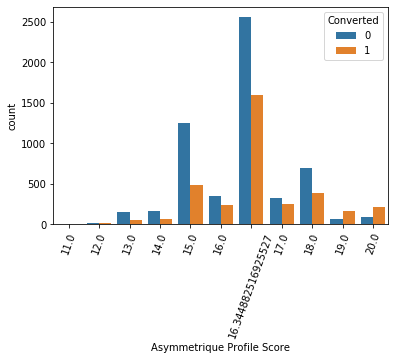

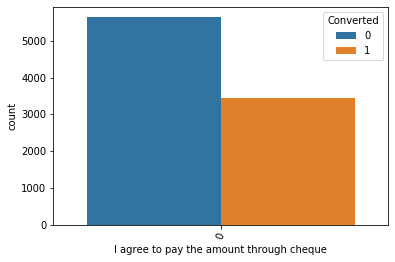

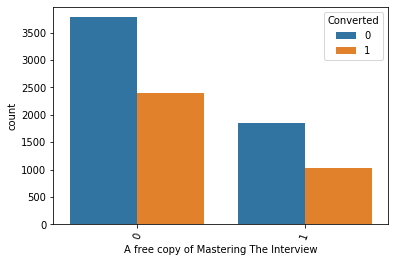

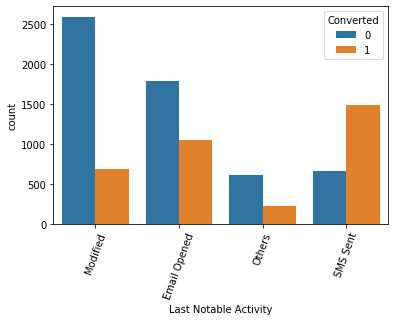

In [49]:
for i in list(df_clean[EDA_vars]):
    sns.countplot(x=df_clean[i],hue=df_clean['Converted'])
    plt.xticks(rotation=70)
    plt.show()

### Inferences
- Most of the traffic driven through Google and Directly through the website has a higher chance of conversion
- The leads to whom SMS were sent out have a higher conversion rate
- Leads with Asymmetric Activity Index as Medium have higher chance of conversion 

## Creation of Dummy Variables

- Binary Variables can be used as they are, Categorical variables require treatment

In [50]:
# Dummy Variables, First for Categorical
cat_var = list(df_clean.select_dtypes(include='O').columns)[1:]

In [51]:
# Getting Dummies for categorical variables
dummy1 = pd.get_dummies(df_clean[cat_var], drop_first=True)

In [52]:
# Concatenating Main Dataframe with Dummies
df_clean = pd.concat([df_clean, dummy1], axis=1)

In [53]:
# Inspecting the resulting Dataframe 
df_clean.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Tags_Ringing,Tags_Will revert after reading the email,Tags_other,City_Other Cities,City_Thane & Outskirts,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Others,0,0,0,0,0,0,0,0,Interested in other courses,0,0,Mumbai,02.Medium,02.Medium,15.0,15.0,0,0,Modified,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,0,0,0,0,0,0,0,0,Ringing,0,0,Other Cities,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,0,0,0,0,0,0,0,0,Will revert after reading the email,0,0,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Others,0,0,0,0,0,0,0,0,Ringing,0,0,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Others,0,0,0,0,0,0,0,0,Will revert after reading the email,0,0,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0


In [54]:
# Dropping the Parent Categorical columns 
df_clean.drop(cat_var,axis=1,inplace=True)

In [55]:
# Checking the Final Dataframe 
df_clean.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Tags_Ringing,Tags_Will revert after reading the email,Tags_other,City_Other Cities,City_Thane & Outskirts,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,15.0,15.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,15.0,15.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,0,0,0,0,0,0,0,0,0,0,14.0,20.0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,0,0,0,0,0,0,0,0,0,0,13.0,17.0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,0,0,0,0,0,0,0,0,0,0,15.0,18.0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0


## Model Building

- Train Test Split

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
# Putting feature variable to X
X = df_clean.drop(['Converted','Prospect ID','Lead Number'], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Tags_Ringing,Tags_Will revert after reading the email,Tags_other,City_Other Cities,City_Thane & Outskirts,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,15.0,15.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,15.0,15.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,0,0,0,0,0,14.0,20.0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,0,0,0,0,0,13.0,17.0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,0,0,0,0,0,15.0,18.0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0


In [58]:
# Putting response variable to y
y = df_clean['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [59]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Scaling 

In [60]:
# Scaling packages 
from sklearn.preprocessing import StandardScaler

In [61]:
# Fitting the Scaler onto numerical variables
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Asymmetrique Activity Score','Asymmetrique Profile Score']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Asymmetrique Activity Score','Asymmetrique Profile Score']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Tags_Ringing,Tags_Will revert after reading the email,Tags_other,City_Other Cities,City_Thane & Outskirts,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low,Last Notable Activity_Modified,Last Notable Activity_Others,Last Notable Activity_SMS Sent
3009,0,0,-0.284595,-0.160255,-0.179666,0,0,0,0,0,0,0,0,0,0,0.001298,0.004938,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0
1012,1,0,-0.284595,-0.540048,-0.179666,0,0,0,0,0,0,0,0,0,0,-1.283648,1.255790,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0
9226,0,0,-0.671384,-0.888650,-1.132538,0,0,0,0,0,0,0,0,0,0,1.667420,-1.011454,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0
4750,0,0,-0.284595,1.643304,-0.179666,0,0,0,0,0,0,0,0,0,0,0.001298,0.004938,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,0,1
7987,0,0,0.295588,2.017593,0.058552,0,0,0,0,0,0,0,0,0,0,-0.299959,0.500042,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0


In [62]:
### Checking the conversion rate
conversion = (sum(df_clean['Converted'])/len(df_clean['Converted'].index))*100
conversion

37.85541106458012

### Feature Selection

In [63]:
# Importing required packages for Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

### Recursive Feature Elimination

In [64]:
# Performing RFE
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 30)             # running RFE with 30 variables as output
rfe = rfe.fit(X_train, y_train)

In [65]:
# Inspecting the results of RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Search', True, 1),
 ('Magazine', False, 8),
 ('Newspaper Article', True, 1),
 ('X Education Forums', True, 1),
 ('Newspaper', False, 4),
 ('Digital Advertisement', True, 1),
 ('Through Recommendations', False, 3),
 ('Receive More Updates About Our Courses', False, 9),
 ('Update me on Supply Chain Content', False, 10),
 ('Get updates on DM Content', False, 11),
 ('Asymmetrique Activity Score', True, 1),
 ('Asymmetrique Profile Score', True, 1),
 ('I agree to pay the amount through cheque', False, 12),
 ('A free copy of Mastering The Interview', False, 7),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 2),
 ('Lead Source_Others', True,

In [66]:
# Storing the chosen Columns as 'col'
col = X_train.columns[rfe.support_]

### Fitting a model

In [67]:
import statsmodels.api as sm
# Adding Constant 
X_train_sm = sm.add_constant(X_train[col])
# Fitting the model
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6320
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1545.2
Date:                Sun, 07 Feb 2021   Deviance:                       3090.5
Time:                        15:16:39   Pearson chi2:                 1.30e+04
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -5.1821      0.467    -11.092      0.000      -6.098      -4.266
Do Not Email                                -1.5233      0.240     -6.341      0.000      -1.994      -1.052
Do Not Call                                 20.1559    1.5e+04      0.001      0.999   -2.94e+04    2.94e+04
TotalVisits                                  0.2006      0.061      3.265      0.001       0.080       0.321
Total Time Spent on Website                  1.1736      0.055     21.221      0.000       1.065       1.282
Page Views Per Visit                        -0.1256      0.065     -1.918      0.055      -0.254       0.003
Search                                       1.1769      1.053      1.117      0.264      -0.887       3.241
Newspaper Article                           16.7406   2.92e+04      0.001      1.000   -5.73e+04    5.73e+04
X Education Forums                         -34.7872   4.13e+04     -0.001      0.999   -8.11e+04     8.1e+04
Digital Advertisement                       -3.2349      3.147     -1.028      0.304      -9.402       2.933
Asymmetrique Activity Score                  1.1325      0.108     10.532      0.000       0.922       1.343
Asymmetrique Profile Score                   0.0813      0.087      0.937      0.349      -0.089       0.251
Lead Origin_Landing Page Submission         -0.7000      0.140     -4.988      0.000      -0.975      -0.425
Lead Origin_Lead Add Form                    3.8874      0.498      7.810      0.000       2.912       4.863
Lead Origin_Lead Import                      1.2642      0.963      1.313      0.189      -0.623       3.151
Lead Source_Google                           0.2980      0.116      2.580      0.010       0.072       0.524
Lead Source_Olark Chat                       0.9844      0.191      5.151      0.000       0.610       1.359
Lead Source_Others                           0.2983      0.416      0.718      0.473      -0.516       1.113
Last Activity_Olark Chat Conversation       -2.0435      0.214     -9.549      0.000      -2.463      -1.624
Last Activity_Others                        -0.8423      0.159     -5.306      0.000      -1.153      -0.531
Last Activity_SMS Sent                       0.1577      0.183      0.864      0.388      -0.200       0.516
Tags_Ringing                                -1.7310      0.444     -3.900      0.000      -2.601      -0.861
Tags_Will revert after reading the email     6.6852      0.401     16.656      0.000       5.899       7.472
Tags_other                                   2.2253      0.355      6.260      0.000       1.529       2.922
City_Thane & Outskirts                      -0.1406      0.182     -0.773      0.440      -0.497       0.216
Asymmetrique Activity Index_02.

In [68]:
# Dropping Insignificant variables
X_train_new = X_train_sm.drop(['Asymmetrique Profile Score','Lead Origin_Lead Import','Lead Source_Others','Do Not Call',
                'Last Activity_SMS Sent','Search','Newspaper Article','X Education Forums',
                'Digital Advertisement','City_Thane & Outskirts','Asymmetrique Profile Index_03.Low','Page Views Per Visit'],1)

In [69]:
# Fitting Another model with updated variables
logm2 = sm.GLM(y_train,X_train_new, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1552.4
Date:                Sun, 07 Feb 2021   Deviance:                       3104.9
Time:                        15:16:40   Pearson chi2:                 1.31e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -5.1037      0.458    -11.153      0.000      -6.001      -4.207
Do Not Email                                -1.5149      0.239     -6.348      0.000      -1.983      -1.047
TotalVisits                                  0.1624      0.047      3.469      0.001       0.071       0.254
Total Time Spent on Website                  1.1611      0.055     21.206      0.000       1.054       1.268
Asymmetrique Activity Score                  1.1114      0.106     10.452      0.000       0.903       1.320
Lead Origin_Landing Page Submission         -0.7380      0.132     -5.581      0.000      -0.997      -0.479
Lead Origin_Lead Add Form                    4.3056      0.285     15.123      0.000       3.748       4.864
Lead Source_Google                           0.2743      0.113      2.424      0.015       0.053       0.496
Lead Source_Olark Chat                       1.0556      0.176      5.985      0.000       0.710       1.401
Last Activity_Olark Chat Conversation       -2.0392      0.212     -9.634      0.000      -2.454      -1.624
Last Activity_Others                        -0.8651      0.155     -5.573      0.000      -1.169      -0.561
Tags_Ringing                                -1.7061      0.441     -3.866      0.000      -2.571      -0.841
Tags_Will revert after reading the email     6.7034      0.398     16.831      0.000       5.923       7.484
Tags_other                                   2.2543      0.352      6.399      0.000       1.564       2.945
Asymmetrique Activity Index_02.Medium        2.2744      0.267      8.522      0.000       1.751       2.797
Asymmetrique Activity Index_03.Low           3.7667      0.615      6.128      0.000       2.562       4.971
Asymmetrique Profile Index_02.Medium        -0.6749      0.130     -5.190      0.000      -0.930      -0.420
Last Notable Activity_Others                 0.6744      0.191      3.523      0.000       0.299       1.050
Last Notable Activity_SMS Sent               1.8599      0.122     15.193      0.000       1.620       2.100
============================================================================================================
"""

In [70]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_new)
y_train_pred[:10]

3009    0.098082
1012    0.005949
9226    0.003280
4750    0.850088
7987    0.677924
1281    0.999185
2880    0.060072
4971    0.961099
7536    0.997607
1248    0.015209
dtype: float64

In [71]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.09808165, 0.0059493 , 0.00327984, 0.85008833, 0.67792352,
       0.99918483, 0.0600721 , 0.96109895, 0.99760691, 0.01520944])

In [72]:
# Creating a dataframe with the actual churn flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.098082
1,0,0.005949
2,0,0.003280
3,1,0.850088
4,1,0.677924


In [73]:
# Creating new column 'hot lead' with 1 if Conversion_Prob > 0.6 else 0
y_train_pred_final['hot_lead'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.6 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,hot_lead
0,0,0.098082,0
1,0,0.005949,0
2,0,0.003280,0
3,1,0.850088,1
4,1,0.677924,1


In [74]:
from sklearn import metrics

In [75]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.hot_lead )
print(confusion)

[[3759  146]
 [ 491 1955]]


In [76]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.hot_lead))

0.8997008345142498


### Variance Inflation Factor

In [77]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [78]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,56.71
15,Asymmetrique Activity Index_03.Low,5.23
13,Tags_other,4.87
12,Tags_Will revert after reading the email,4.44
4,Asymmetrique Activity Score,4.18
14,Asymmetrique Activity Index_02.Medium,3.56
11,Tags_Ringing,3.01
8,Lead Source_Olark Chat,2.40
5,Lead Origin_Landing Page Submission,2.04
6,Lead Origin_Lead Add Form,1.71


In [79]:
# Dropping the column with VIF > 5
X_train_new_2 = X_train_new.drop('Asymmetrique Activity Index_03.Low',1)

In [80]:
# Fitting another model with updated variables
logm3 = sm.GLM(y_train,X_train_new_2, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1570.7
Date:                Sun, 07 Feb 2021   Deviance:                       3141.3
Time:                        15:16:40   Pearson chi2:                 1.30e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -4.0345      0.416     -9.706      0.000      -4.849      -3.220
Do Not Email                                -1.5003      0.239     -6.276      0.000      -1.969      -1.032
TotalVisits                                  0.1674      0.048      3.520      0.000       0.074       0.261
Total Time Spent on Website                  1.1534      0.054     21.212      0.000       1.047       1.260
Asymmetrique Activity Score                  0.6361      0.070      9.079      0.000       0.499       0.773
Lead Origin_Landing Page Submission         -0.7254      0.131     -5.522      0.000      -0.983      -0.468
Lead Origin_Lead Add Form                    4.3221      0.284     15.243      0.000       3.766       4.878
Lead Source_Google                           0.2636      0.112      2.352      0.019       0.044       0.483
Lead Source_Olark Chat                       1.0717      0.175      6.107      0.000       0.728       1.416
Last Activity_Olark Chat Conversation       -1.9914      0.212     -9.373      0.000      -2.408      -1.575
Last Activity_Others                        -0.8346      0.155     -5.393      0.000      -1.138      -0.531
Tags_Ringing                                -1.6555      0.441     -3.754      0.000      -2.520      -0.791
Tags_Will revert after reading the email     6.7561      0.399     16.918      0.000       5.973       7.539
Tags_other                                   2.2877      0.353      6.485      0.000       1.596       2.979
Asymmetrique Activity Index_02.Medium        1.1067      0.183      6.062      0.000       0.749       1.464
Asymmetrique Profile Index_02.Medium        -0.6207      0.128     -4.838      0.000      -0.872      -0.369
Last Notable Activity_Others                 0.6364      0.192      3.323      0.001       0.261       1.012
Last Notable Activity_SMS Sent               1.8373      0.121     15.179      0.000       1.600       2.074
============================================================================================================
"""

In [81]:
vif = pd.DataFrame()
vif['Features'] = X_train_new_2.columns
vif['VIF'] = [variance_inflation_factor(X_train_new_2.values, i) for i in range(X_train_new_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,39.56
13,Tags_other,4.87
12,Tags_Will revert after reading the email,4.43
11,Tags_Ringing,3.01
8,Lead Source_Olark Chat,2.40
5,Lead Origin_Landing Page Submission,2.04
6,Lead Origin_Lead Add Form,1.70
10,Last Activity_Others,1.67
9,Last Activity_Olark Chat Conversation,1.49
3,Total Time Spent on Website,1.41


- The P-Values indicate all variables are significant 
- All VIF values are less than 5

`Model is Finalised`

In [82]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_new_2)
y_train_pred[:10]

3009    0.098147
1012    0.010444
9226    0.004890
4750    0.845464
7987    0.694264
1281    0.998787
2880    0.059882
4971    0.958944
7536    0.997811
1248    0.017550
dtype: float64

In [83]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.09814671, 0.01044383, 0.00488965, 0.84546425, 0.6942644 ,
       0.99878663, 0.0598818 , 0.95894431, 0.99781146, 0.01754964])

In [84]:
# Creating a dataframe with the actual churn flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.098147
1,0,0.010444
2,0,0.004890
3,1,0.845464
4,1,0.694264


In [85]:
# Creating new column 'hot lead' with 1 if Conversion_Prob > 0.6 else 0
y_train_pred_final['hot_lead'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.6 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,hot_lead
0,0,0.098147,0
1,0,0.010444,0
2,0,0.004890,0
3,1,0.845464,1
4,1,0.694264,1


In [86]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.hot_lead )
print(confusion)

[[3758  147]
 [ 492 1954]]


In [87]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.hot_lead))

0.8993859234766178


- Accuracy hasn't dropped much

### Metrics beyond simply accuracy

In [88]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [89]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7988552739165985

In [90]:
# Let us calculate specificity
TN / float(TN+FP)

0.9623559539052496

In [91]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.03764404609475032


In [92]:
# positive predictive value 
print (TP / float(TP+FP))

0.9300333174678724


In [93]:
# Negative predictive value
print (TN / float(TN+ FN))

0.884235294117647


## ROC Curve

In [94]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [95]:
# Calculating Metrics for ROC 
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

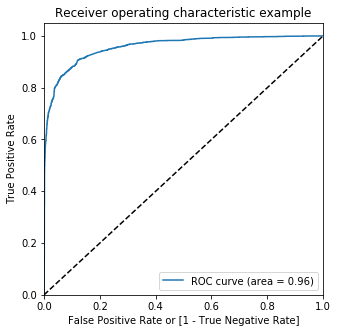

In [96]:
# Plotting ROC curve
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

### Finding the optimal cutoff point ( Probability Cutoff )

In [97]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,hot_lead,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.098147,0,1,0,0,0,0,0,0,0,0,0
1,0,0.010444,0,1,0,0,0,0,0,0,0,0,0
2,0,0.004890,0,1,0,0,0,0,0,0,0,0,0
3,1,0.845464,1,1,1,1,1,1,1,1,1,1,0
4,1,0.694264,1,1,1,1,1,1,1,1,0,0,0


In [98]:
# Now calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.385136     1.000000     0.000000
0.1   0.1  0.783026     0.972200     0.664533
0.2   0.2  0.851519     0.939493     0.796415
0.3   0.3  0.888207     0.890842     0.886556
0.4   0.4  0.896709     0.860589     0.919334
0.5   0.5  0.901433     0.831971     0.944942
0.6   0.6  0.899386     0.798855     0.962356
0.7   0.7  0.885215     0.745298     0.972855
0.8   0.8  0.876555     0.705642     0.983611
0.9   0.9  0.849787     0.623467     0.991549


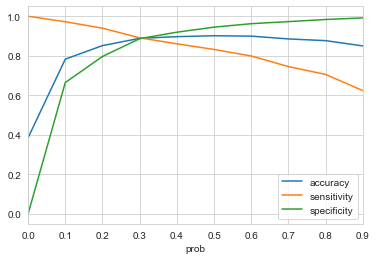

In [99]:
# plotting accuracy sensitivity and specificity for various probabilities.
sns.set_style('whitegrid')
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

- 0.3 is chosen as the optimal cutoff point

In [100]:
# 0.3 is used to predict the final values
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,hot_lead,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.098147,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.010444,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.004890,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.845464,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.694264,1,1,1,1,1,1,1,1,0,0,0,1


In [101]:
# Calculating Accuracy with 0.3 Cutoff on the training set
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8882065816406866

In [102]:
# Plotting the confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3462,  443],
       [ 267, 2179]])

In [103]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [104]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8908421913327882

In [105]:
# Let us calculate specificity
TN / float(TN+FP)

0.8865556978233035

In [106]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.11344430217669654


In [107]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8310450038138826


In [108]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9283990345937249


### Precision & Recall 

In [109]:
# Importing the packages for required metrics 
from sklearn.metrics import precision_score, recall_score
# Calculating precision score
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8310450038138826

In [110]:
# Calculating Recall
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8908421913327882

## Making Predictions on Test Set

### Scaling

In [111]:
# Scaling test set
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Asymmetrique Activity Score','Asymmetrique Profile Score']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Asymmetrique Activity Score','Asymmetrique Profile Score']])

In [112]:
# Filtering X_Test for the finally used columns in model
X_test = X_test[X_train_new_2.columns[1:]]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Asymmetrique Activity Score,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Google,Lead Source_Olark Chat,Last Activity_Olark Chat Conversation,Last Activity_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_other,Asymmetrique Activity Index_02.Medium,Asymmetrique Profile Index_02.Medium,Last Notable Activity_Others,Last Notable Activity_SMS Sent
3271,0,0.102194,-0.600595,0.001298,0,0,1,0,0,0,0,0,1,1,1,0,0
1490,0,0.295588,1.887326,-1.283648,1,0,0,0,0,0,0,1,0,1,0,0,0
7936,0,-0.284595,-0.752879,1.667420,0,0,1,0,0,0,0,0,1,0,1,0,0
4216,0,-0.671384,-0.888650,0.683730,0,1,0,0,0,0,0,0,1,1,1,0,0
3830,0,0.875771,-0.587751,0.001298,1,0,0,0,0,0,0,0,1,1,1,0,0


In [113]:
# Adding Constant variable to X_Test
X_test_sm = sm.add_constant(X_test)

In [114]:
# Making predictions
y_test_pred = res.predict(X_test_sm)

In [115]:
# Checking the predictions
y_test_pred[:10]

3271    0.158150
1490    0.989148
7936    0.123550
4216    0.913627
3830    0.074690
1800    0.953432
6507    0.010001
4821    0.165912
4223    0.999907
4714    0.209856
dtype: float64

In [116]:
# Creating a dataframe of predicted probabilities 
y_pred_1 = pd.DataFrame(y_test_pred,columns=['Conversion_Prob'])
y_pred_1.head()

,Conversion_Prob
3271,0.158150
1490,0.989148
7936,0.123550
4216,0.913627
3830,0.074690


In [117]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [118]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [119]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [120]:
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.158150
1,1,0.989148
2,0,0.123550
3,1,0.913627
4,0,0.074690


### Calculating Lead Score

In [121]:
# Lead Score added to Predictions
y_pred_final['Lead Score'] = (y_pred_final['Conversion_Prob']*100).round(2)
y_pred_final.head()

,Converted,Conversion_Prob,Lead Score
0,0,0.158150,15.81
1,1,0.989148,98.91
2,0,0.123550,12.36
3,1,0.913627,91.36
4,0,0.074690,7.47


In [122]:
# Final predicted values added to determine further metrics
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.3 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,Lead Score,final_predicted
0,0,0.158150,15.81,0
1,1,0.989148,98.91,1
2,0,0.123550,12.36,0
3,1,0.913627,91.36,1
4,0,0.074690,7.47,0


In [123]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8696290855673889

In [124]:
# Printing the Confusion Matrix
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1520,  214],
       [ 141,  848]])

In [125]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [126]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8574317492416582

In [127]:
# Let us calculate specificity
TN / float(TN+FP)

0.8765859284890427

In [128]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.12341407151095732


In [129]:
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8574317492416582

In [130]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8310450038138826

## Results :
- Sensitivity of 85.7 % was found on test data, which shows that a high percentage of hot leads are being captured by our model
- With a precision score of 83.1 % , it shows that our model is returning a high a number of relevant results i.e. out of all predicted values, 83.1% are correct

`Lead Scores are provided on test set and can be adjusted by using the cutoff value`

## Recommendations 

- When the sales team has some extra workforce, We could drop the cut-off lower in order to increase sensitivity so we capture all the potential leads, this will result in a rise of cold leads but will help in overall conversion rate

- To minimise the rate of useless calls, we need to raise the specificity of the model, for that we’ll have to raise the cut off point for our Lead Score, In turn targeting only those leads who are considered super important by our model, we might miss out on some potential leads this way, but atleast all of our calls will have a much better chance of conversion